# Captcha Recognition With K-Nearest-Neighbours

Import required libraries

In [1]:
import numpy as np                  # used for creating numpy arrays for model creation
import cv2                          # used for image processing
import os                           # used to read files and directory structure

Define global variables

In [2]:
RESIZED_IMAGE_WIDTH = 20                    # width of resized image
RESIZED_IMAGE_HEIGHT = 30                   # height of resized image

DATASET_PATH = os.getcwd() + '/dataset/'    # Dataset path

## TRAIN MODEL

### Load Dataset

Open training characters image

In [3]:
X = []              # flattened images
y = []              # labels

In [4]:
for char in os.listdir(DATASET_PATH):               # for each character folder
    # print(char)                                     # print the character name
    if (len(char) > 1):                             # if the folder name is more than 1 character, skip it
        continue
    for img in os.listdir(DATASET_PATH + char):     # for each image in the folder
        if img[-3:] != 'png':                       # if the image is not a png file, skip it
            continue
        # read the image
        image = cv2.imread(DATASET_PATH + char + '/' + img, cv2.IMREAD_GRAYSCALE)
        # flatten the image
        flattenedImage = image.reshape(RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT)
        X.append(flattenedImage)                    # append the image to the X array
        y.append(ord(char))                         # append the class number to the y array

In [5]:
# convert to numpy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [6]:
print(X.shape)
print(y.shape)

(10000, 600)
(10000,)


Normalize The Data

In [7]:
X /= 255.0

Plot Dataset

In [8]:
import seaborn as sns                   # used for plotting graphs
import matplotlib.pyplot as plt         # used for plotting graphs

In [9]:
# count the number of times each class occurs
plot = np.unique(y, return_counts=True)

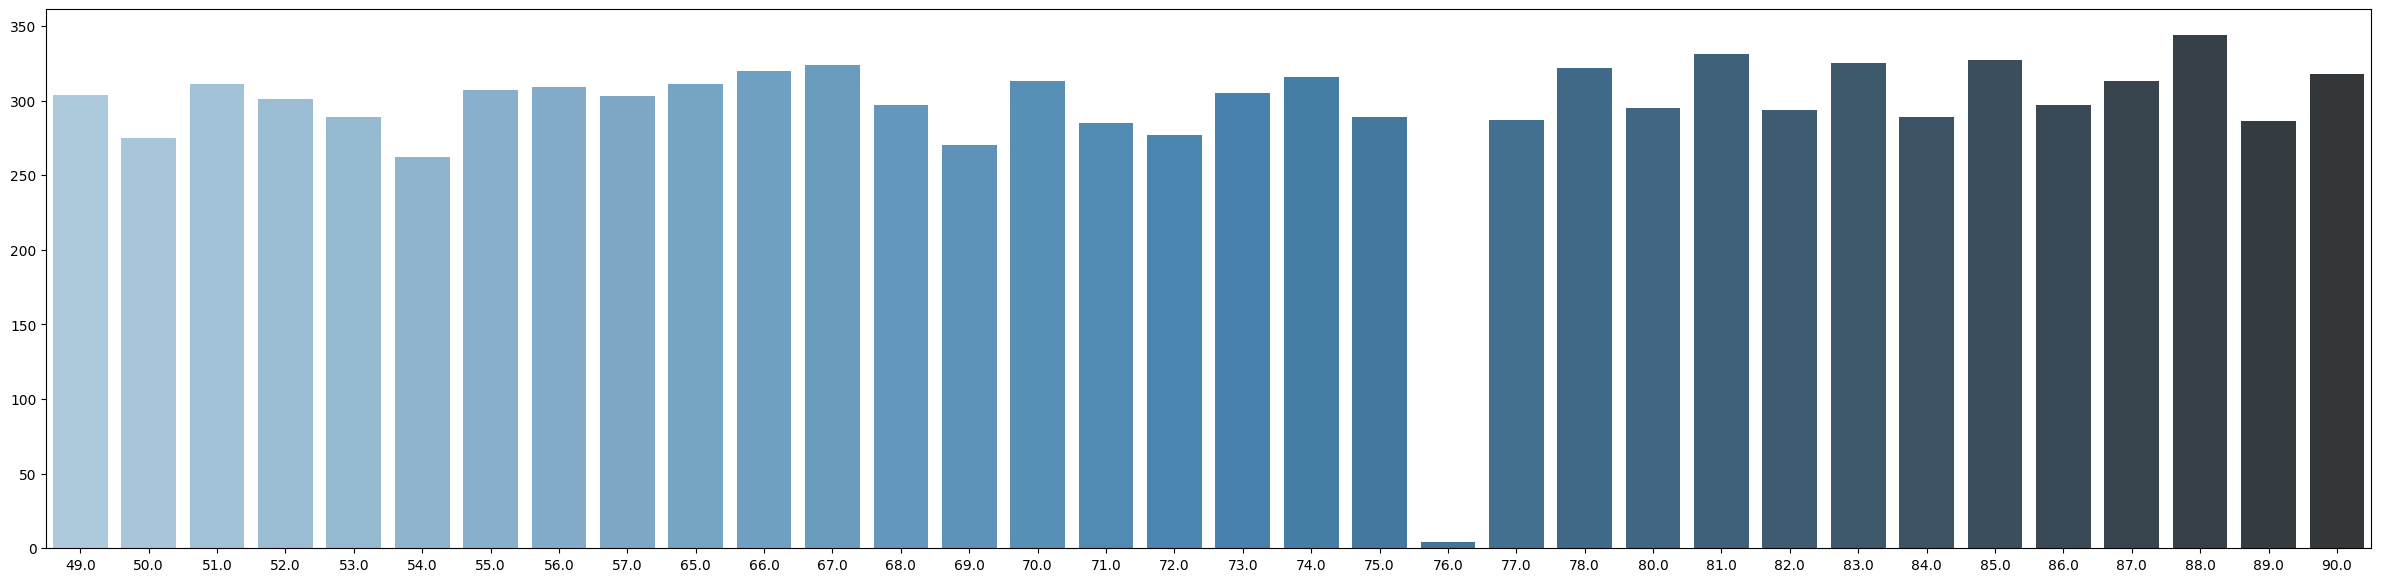

In [10]:
plt.figure(figsize = (30, 7))                                       # set the size of the plot
sns.barplot(x = plot[0], y = plot[1], palette='Blues_d')            # plot the graph
plt.show()                                                          # show the graph

### Split dataset in training and testing data

Import Libraries

In [11]:
from sklearn.neighbors import KNeighborsClassifier       # KNN classifier
from sklearn.model_selection import train_test_split     # used for splitting the dataset into training and testing sets
from sklearn.metrics import classification_report        # used for evaluating the model

Split Dataset

In [12]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Plot Training Data

In [13]:
# count the number of times each class occurs in training set
plot_train = np.unique(y_train, return_counts=True)

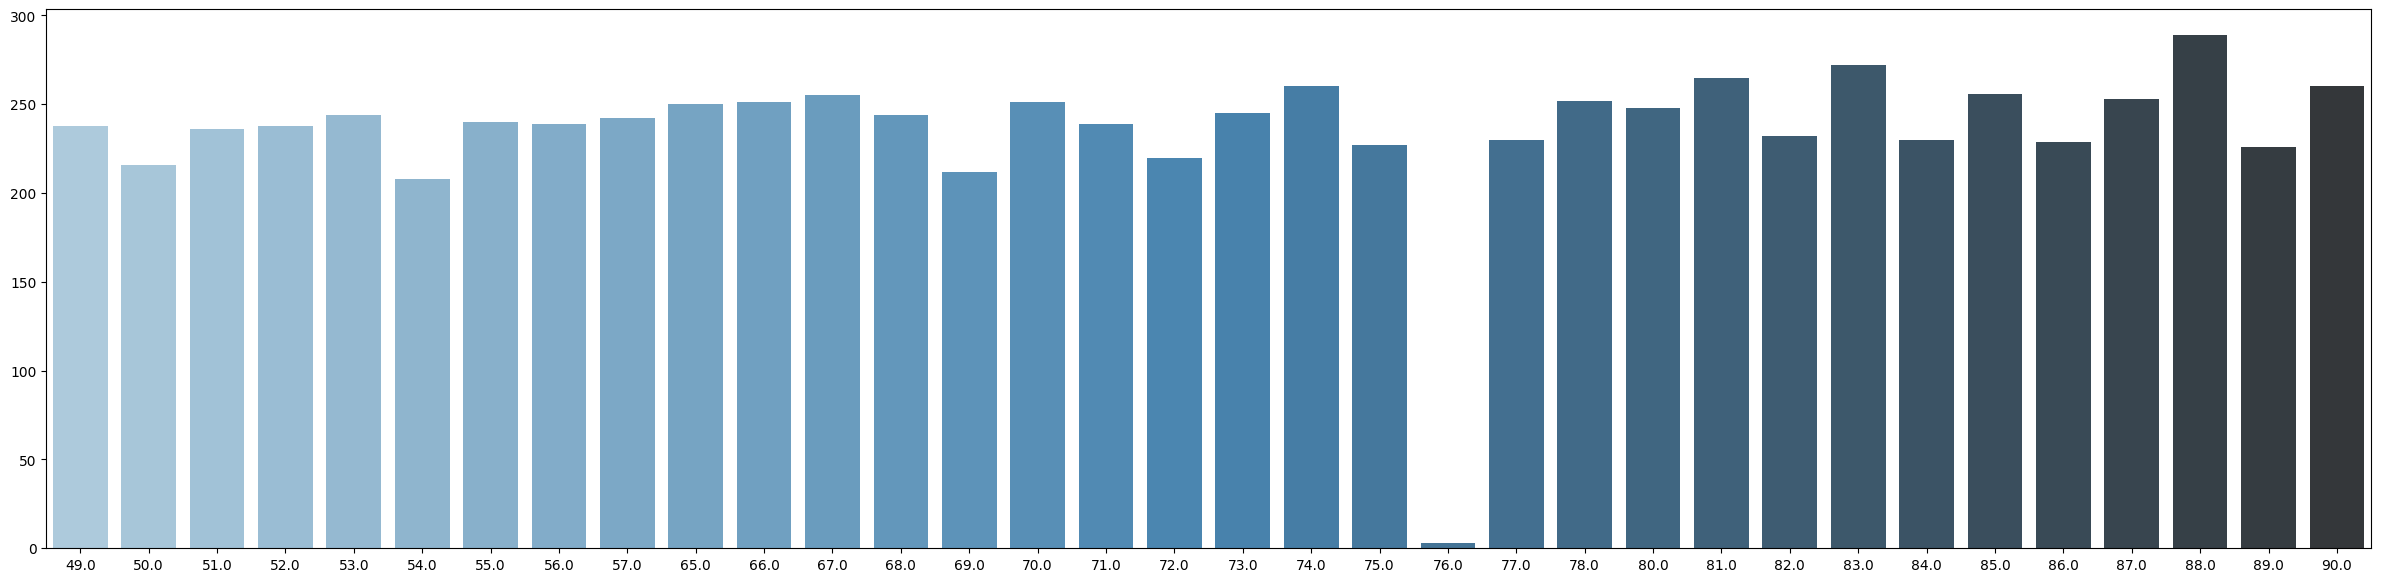

In [14]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_train[0], y = plot_train[1], palette='Blues_d')    # plot the graph
plt.show()                                                              # show the graph

Plot Testing Data

In [15]:
# count the number of times each class occurs in testing set
plot_test = np.unique(y_test, return_counts=True)

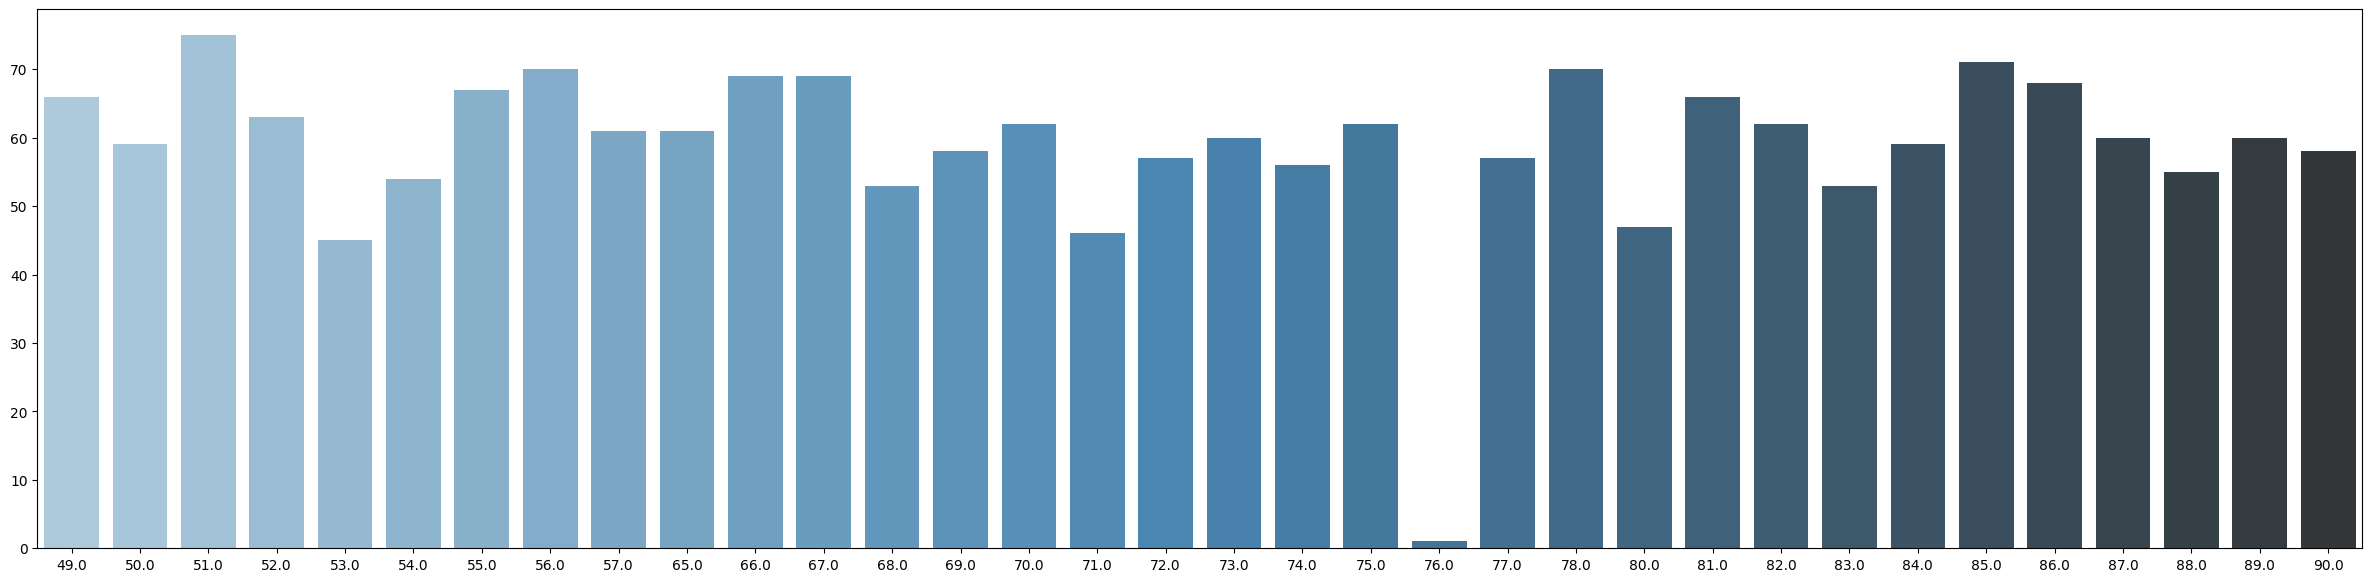

In [16]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_test[0], y = plot_test[1], palette = 'Blues_d')    # plot the graph
plt.show()                                                              # show the graph

### Create K-Nearest-Neighbours Model

Create KNN object

In [17]:
kNearest = KNeighborsClassifier(n_neighbors = 3)    # create the KNN classifier, 
kNearest.fit(X_train, y_train)                      # train the model

KNeighborsClassifier(n_neighbors=3)

Print Model Statistics

In [18]:
# print classification report
test_score = classification_report(y_test, kNearest.predict(X_test), output_dict=True, zero_division=1)

In [19]:
import pandas as pd                             # used for creating dataframes

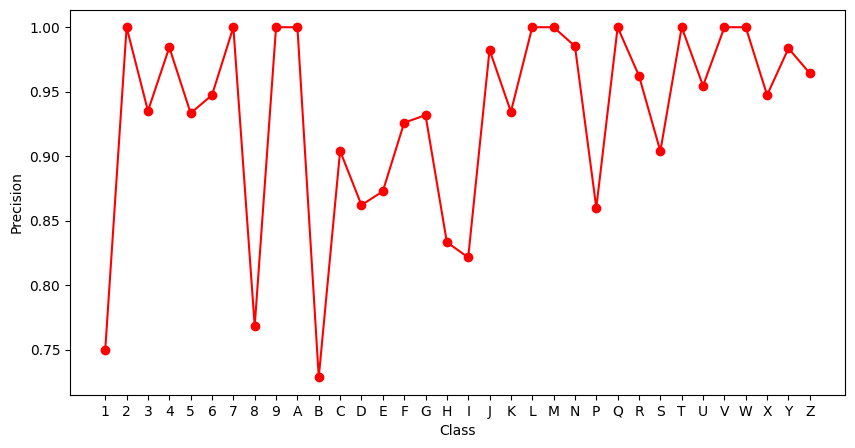

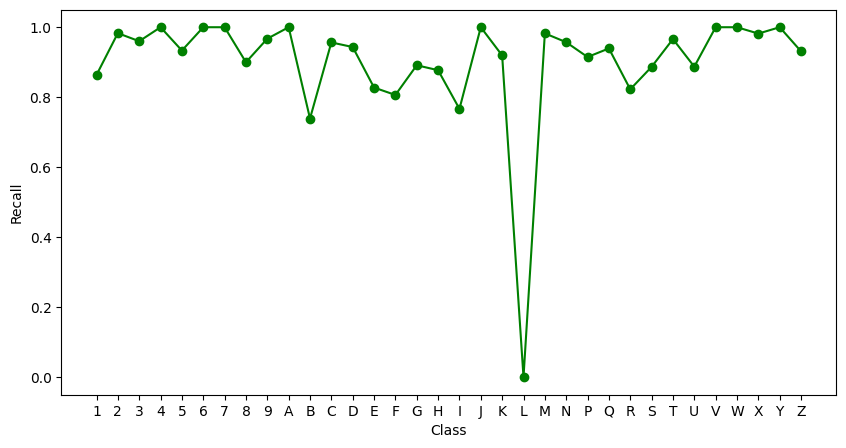

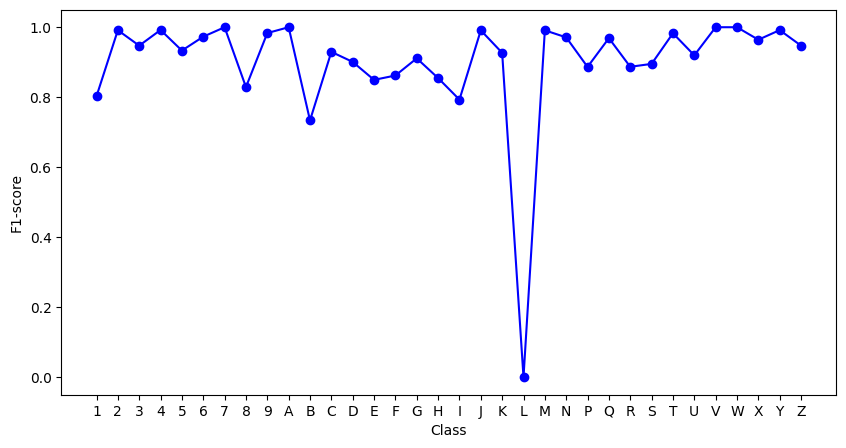

In [20]:
# plot accuracy for each class
df = pd.DataFrame(test_score).transpose()       # convert the dictionary to a dataframe
df = df[:-3]                                    # remove accuracy, macro avg, weighted avg
df['class'] = df.index                          # add a column for class name
# convert class number to character
df['class'] = df['class'].apply(lambda x: chr(int(float(x))))

plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['precision'], label = 'precision', color = 'red', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['recall'], label = 'recall', color = 'green', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['f1-score'], label = 'f1-score', color = 'blue', marker = 'o')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.show()

### Hyperparameter Tuning

Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV            # used for hyperparameter tuning

In [22]:
k_range = list(range(1, 11))                # range of k values

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)

In [23]:
grid = GridSearchCV(kNearest, param_grid, cv=10,    # instantiate the grid
                    scoring='accuracy')
grid.fit(X, y)                                      # fit the grid with data

/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

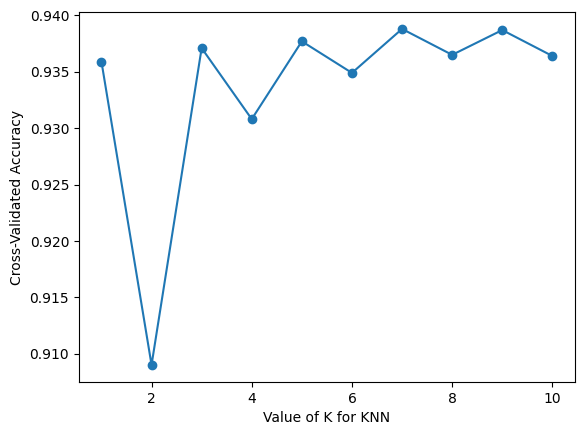

In [24]:
# examine the best model
grid_mean_scores = grid.cv_results_['mean_test_score']

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, grid_mean_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [25]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9388
{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


In [26]:
# create the KNN classifier
kNearest = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
# train the model
kNearest.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## TEST MODEL

In [27]:
DATASET = os.listdir(os.getcwd() + '/samples/')    # get the list of images in the samples folder

Select 5 random images from dataset

In [28]:
import random                                  # used for generating random numbers

images = random.sample(DATASET, 5)             # select 5 random images from the dataset
image_list = []                                # create an empty list to store the images

Read all images

In [29]:
for i in images:                               # for each image in the list
    img = cv2.imread(os.getcwd() + '/samples/' + i)     # read the image
    image_list.append(img)                              # append the image to the list

Calculate Height and Width of Image

In [30]:
IMAGE_HEIGHT = image_list[0].shape[0]           # get the height of the image
IMAGE_WIDTH = image_list[0].shape[1]            # get the width of the image
print(IMAGE_HEIGHT, IMAGE_WIDTH)

50 180


Preprocess Image

In [31]:
def preprocess(img):
    # convert to grayscale
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get binary image
    thresh = cv2.adaptiveThreshold( imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 0)

    # remove noise from image
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

    # get dilated image
    dilate = cv2.dilate(close, np.ones((2, 2), np.uint8), iterations=1)

    # invert image colors
    image = cv2.bitwise_not(dilate)

    # display image
    plt.imshow(image, cmap='gray')
    plt.show()

    return image

Predict image

In [32]:
def predict(img):
    image = preprocess(img)                     # preprocess the image
    pred = []                                   # create an empty list to store the predictions
    for i in range(0, IMAGE_WIDTH, IMAGE_WIDTH//5):
        # get character from captcha
        letter = image[10:IMAGE_HEIGHT-10, i:i+IMAGE_WIDTH//5]
        # resize image to 20x30
        letter = cv2.resize(letter, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
        # dilate image
        letter = cv2.dilate(letter, np.ones((2, 2), np.uint8), iterations=1)
        # flatten image to 1d numpy array
        letter = letter.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))
        letter = np.float32(letter)         # convert to float32
        letter /= 255                       # normalize
        
        # get prediction
        res = kNearest.predict(letter)      # predict the character
        res = chr(int(res[0]))              # convert the result to character
        pred.append(res)                    # append the prediction to the list
    return ''.join(pred)                    # return the prediction as string

Predict all captchas

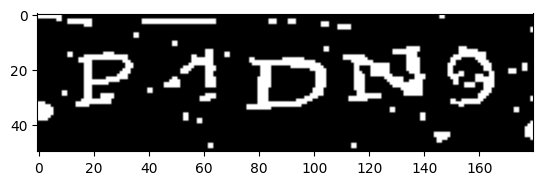

P4DN9
P4DN9.png


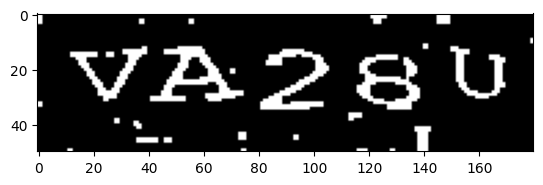

VA28D
VA28U.png


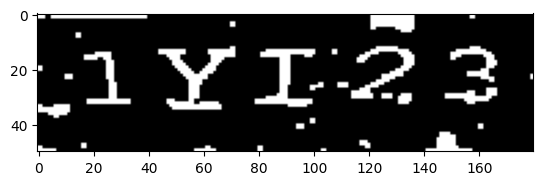

1YI23
1YI23.png


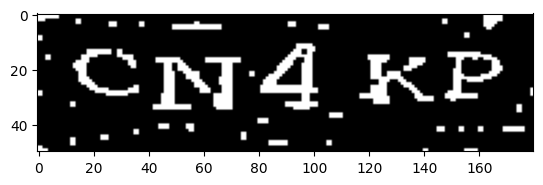

CN4KP
CN4KP.png


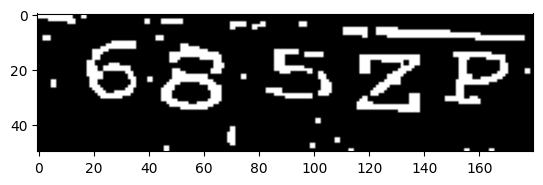

685ZP
685ZP.png


In [33]:
for i in range(len(image_list)):
    print(predict(image_list[i]))
    print(images[i])